In [1]:
import gpmp.num as gnp
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from src.gpmodelmetrics import GPExperiment
from src.functions import goldstein_price

if gnp._gpmp_backend_ == "torch":
    import torch

Using backend: torch


In [2]:
# set seed for reproductability
if gnp._gpmp_backend_ == "torch":
    torch.manual_seed(0)
np.random.seed(0)

The cloud is built using the Goldstein-Price in dimension $d=2$, it is possible to use another function but you must specify its dimension and the bounds of the domain.

In [3]:
# Goldstein Price function

# dimension of the design
d = 2

# bound of the domain
x_min = gnp.array([-2, -2])
x_max = gnp.array([2, 2])

# Regularity of the GP model 
p = 2

n_train = 150
n_test = 1500

First define the class for the cloud, the design of experiment is constructed as well as the GP model. The GP model depends on a hyperparameter $\theta$ and it is selected by maximum restricted likelihood $\theta_{\rm REML}$.

In [4]:
gpexperiment = GPExperiment(
    d, p, x_min, x_max, goldstein_price, n_train=n_train, n_test=n_test
)

Model diagnosis
----------------
  ***  Parameter selection
    cvg_reached: True
    optimal_val: True
        n_evals: 18
           time: 0.08798
    initial_val: 1.5297e3
      final_val: 1.4838e3
  ***  Parameters
          sigma: 3826141.817909447
           rho0: 10.862855536303275
           rho1: 9.111685383649618
  ***  Data
   count: 150
   ----
              mean      std      min      max    delta delta_norm
     zi:   4.196e4  1.025e5   16.301  7.105e5  7.105e5      0.186
   xi_0:    0.0269    1.185   -1.993    1.937    3.930      0.362
   xi_1: -9.507e-3    1.145   -1.992    1.991    3.984      0.437


In [5]:
# Bounds for GP parameters when computing the cloud
s = 10
logs = np.log(s)
lb = gpexperiment.model.covparam - logs
ub = gpexperiment.model.covparam + logs

Explanation: We choose ± logs around the covariance parameters to
allow substantial but controlled variation in the parameters.  This
range ensures that the parameters can vary significantly (by a
factor of approximately s in both directions on the original
scale), which is often sufficient for sensitivity analysis while
preventing extreme values that might lead to numerical instability
or non-meaningful results.

Then compute the metrics for the J+GP method and for the prediction by a GP model with parameter varying. 

In [6]:
# Compute the metrics for a random set of parameters
set_size = 20000
covparam_set = gpexperiment.evaluate_model_variation(lb, ub, set_size=set_size)


# Conformal prediction
gpexperiment.j_plus_gp_point()

Finally display the points.

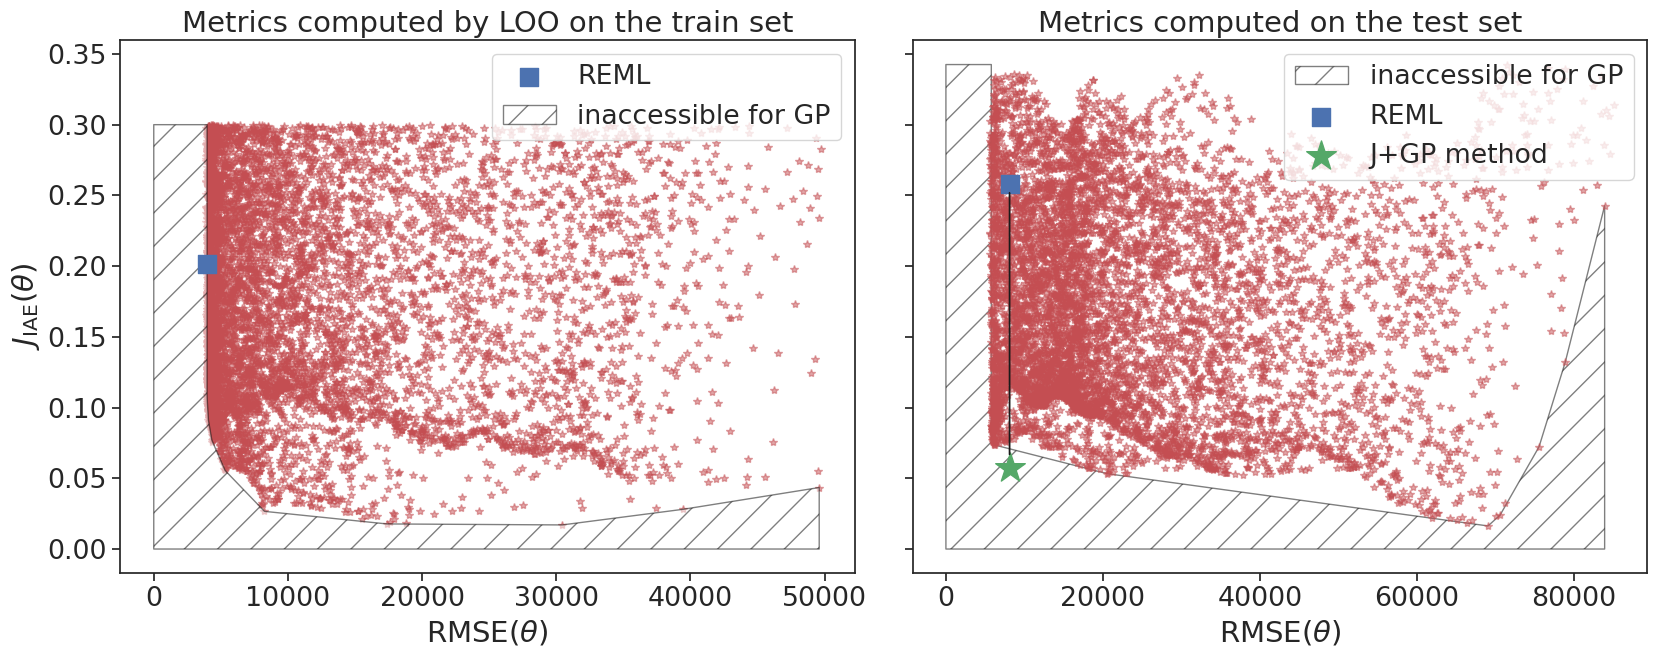

In [7]:
# set the style
sns.set_theme(style="ticks", font_scale=1.75)
iae_max = 0.3
x_loo_max = 5e4

# save the figure (if path is None the Figure is not saved)
path = None

nb_points_plotted = gpexperiment.plot(iae_max=iae_max, x_loo_max=x_loo_max, path=path)

In [8]:
print(f"number of points plotted = {nb_points_plotted}")

number of points plotted = 6848
